<a href="https://colab.research.google.com/github/suyasuyao/Kikagaku-Tyouki-Colab/blob/main/%E9%95%B7%E6%9C%9F%E3%82%B3%E3%83%BC%E3%82%B9_%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%AE%E5%9F%BA%E7%A4%8E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 教師あり学習　回帰①

# 重回帰分析の実装

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# データセットの読み込み xは入力、tは目標値として読み込み
from sklearn.datasets import load_boston
dataset = load_boston()
x,t = dataset.data, dataset.target
columns = dataset.feature_names

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
type(x), x.shape, type(t), t.shape

(numpy.ndarray, (506, 13), numpy.ndarray, (506,))

In [ ]:
#xをdfというデータフレームに変換
df = pd.DataFrame(x,columns = columns)


In [ ]:
# tをdfデータフレームに格納
df['Target'] = t 
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# xを入力　tを目標として再度設定　再度numpyに戻す
t = df['Target'].values
x = df.drop(labels=['Target'],axis=1).values


# 学習用データセットとテスト用データセットへ分割

In [ ]:
from sklearn.model_selection import train_test_split
# x_trainは学習用入力、x_testはテスト用学習、t_trainは学習用目標t_testはテスト用目標に分割　テストデータは30% ランダムのシード値は０（数字は固定であればいい）
x_train, x_test,t_train, t_test= train_test_split(x,t, test_size=0.3, random_state = 0)

# モデルの学習検証

In [ ]:
# モデルの定義
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [ ]:
# モデルの学習　xとtの訓練で

model.fit(x_train, t_train)

LinearRegression()

In [ ]:
# coefは重みパラメータw
# wは重回帰分析の式を表すためのパラメータ

model.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

In [ ]:
# 学習後のパラメータ w 
model.intercept_

37.93710774183309

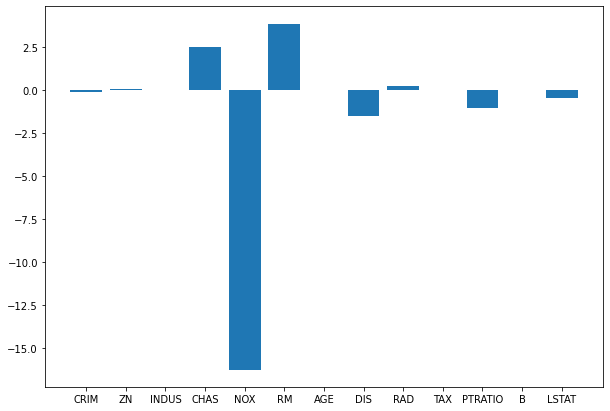

In [ ]:
# パラメータの分布をヒストグラムで可視化
# matplotで横が10インチ、縦が７インチの大きさになる　画面の数値の尺度ではない
plt.figure(figsize=(10,7))
# 横はカラム名　縦はwの値
plt.bar(x=columns, height=model.coef_);

In [ ]:
# scoreで決定係数を検証　学習用入力ｘから学習用目標tが導き出せるかの決定係数
print('train score : ', model.score(x_train, t_train))
# scoreで決定係数を検証　テスト用入力ｘからテスト用目標tが導き出せるかの決定係数
print('test score : ', model.score(x_test, t_test))

# 結果があまりよくない（trainとくらべてtestが１から離れてる）ので過学習

train score :  0.7645451026942549
test score :  0.6733825506400171


# 推論

In [ ]:
# 推論
y = model.predict(x_test)

In [ ]:
print('予測値: ', y[0])
print('目標値: ', t_test[0])

予測値:  24.935707898576915
目標値:  22.6




---



# 線形回帰の過学習を抑制する手法

In [ ]:
# Rigge回帰クラス　alphaは正則化の厳しさ
from sklearn.linear_model import Ridge
ridge =  Ridge(alpha=1)

In [ ]:
# モデルの学習
ridge.fit(x_train, t_train)

Ridge(alpha=1)

In [ ]:
# モデルの検証（テスト結果の性能悪い（）
print('train score:', ridge.score(x_train, t_train))
print('test score:', ridge.score(x_test,t_test))

train score: 0.7623440182689594
test score: 0.6665819091486687


Text(0.5, 1.0, 'Ridge Regression')

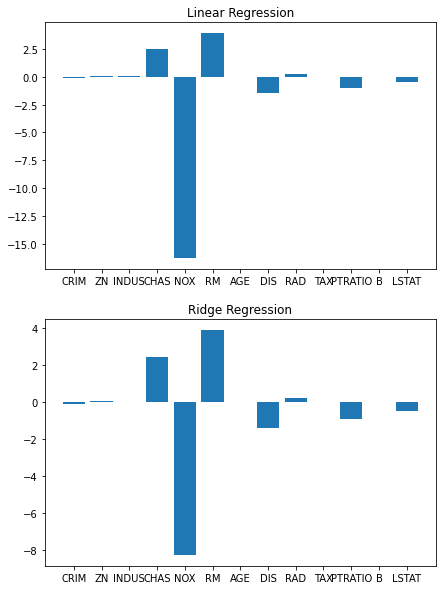

In [ ]:
# 箱を準備
fig = plt.figure(figsize=(7,10))

# 重回帰分析 subplotは２行１列マスの１つめ
ax1 = fig.add_subplot(2,1,1)
ax1.bar(x=columns,height=model.coef_)
ax1.set_title('Linear Regression')

#リッジ回帰subplotは２行１列マスの2つめ
ax2 = fig.add_subplot(2,1,2)
ax2.bar(x=columns,height=ridge.coef_)
ax2.set_title('Ridge Regression')

---


# 章末問題


世帯収入（変数名：Total Household Income）に対して、相関係数の絶対値が 0.5 を超える特徴量をすべて選択せよ
線形モデルを利用する場合、目標値と線形の関係性を持つ特徴量は予測に効くと考え、目標値との相関係数が高いものを選択する考え方があります。

今回は、Total Household Income を予測するモデルを考えましょう。

要件
データセット：income_and_expenditure.csv
ヒント
相関行列を作成してみましょう。
絶対値の取得方法を調べてみましょう。

In [ ]:
# モジュール
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline



In [ ]:
# データの読み込み　income_and_expenditure.csv 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/income_and_expenditure.csv')
df.head(3)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# データセットの準備
df.shape

(41544, 60)

In [ ]:
#データの切り分け
# x（Total Household Income以外） t(Total Household Income)
x = df.drop('Total Household Income', axis=1).values
t = df['Total Household Income'].values

print(x.shape,t.shape)

(41544, 59) (41544,)


In [ ]:
#Q1
# 相関係数
tmp = df.corr()['Total Household Income']
# 絶対値が0.5

tmp[np.abs(tmp) > 0.5]

Total Household Income                           1.000000
Total Food Expenditure                           0.663660
Meat Expenditure                                 0.567142
Restaurant and hotels Expenditure                0.510017
Clothing, Footwear and Other Wear Expenditure    0.605992
Housing and water Expenditure                    0.676186
Imputed House Rental Value                       0.574091
Transportation Expenditure                       0.639939
Communication Expenditure                        0.710140
Miscellaneous Goods and Services Expenditure     0.666288
Total Income from Entrepreneurial Acitivites     0.563662
Number of Airconditioner                         0.551994
Number of Car, Jeep, Van                         0.546663
Number of Personal Computer                      0.557561
Name: Total Household Income, dtype: float64

In [ ]:
#Q2
tmp2=df.columns
expenditure_list = []

for col in df.columns:
  # 文字列が含まれるかどうか
  if 'Expenditure' in col:
      expenditure_list.append(col)

# 

In [ ]:
len(expenditure_list)

18

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


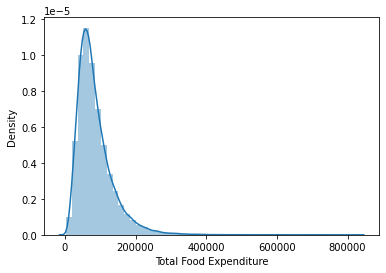

In [ ]:
#Q3 
# 横に長いから正規分布ではない
sns.distplot(df['Total Food Expenditure'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


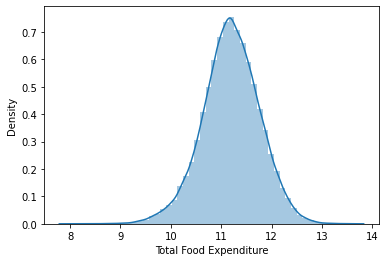

In [ ]:
# 対数変換
sns.distplot(np.log1p(df['Total Food Expenditure']))

In [ ]:
food = np.log1p(df['Total Food Expenditure'])
# 平均 mean 中央 median
mu = food.mean()
# 偏差
sigma = food.std()

# データの数 -　３σ法で分布に収まる数
len(food) - len(food[(mu - 3 * sigma <= food) & (food <= mu +3 * sigma)])

204

In [ ]:
len(food) , len(food[(mu - 3 * sigma <= food) & (food <= mu +3 * sigma)])

(41544, 41340)

#Q4世帯収入（変数名：Total Household Income）を目標値として Lasso を適用した時、重みが 0 となる特徴量をすべて選択せよ

- データセット：income_and_expenditure.csv
-Q3 で外れ値と見なされたサンプルは除外
- 説明変数には、Expenditure という文字が含まれる特徴量をすべて使用（それ以外の特徴量は使用しないこと）
- train : test = 7 : 3 に分割
- 乱数のシードは 0 で固定すること
- Lasso(alpha=1) とすること



In [ ]:
# FoodExpenditureの外れ値除去したインデックス
indicies = food[(mu - 3 * sigma <= food) & (food <= mu +3 * sigma)]
indicies

0        11.677159
1        11.123831
2        11.028579
3        11.266897
4        11.457688
           ...    
41539    10.711658
41540    10.346826
41541    10.733850
41542    11.307339
41543    11.266974
Name: Total Food Expenditure, Length: 41340, dtype: float64

In [ ]:
# 外れ値除去したインデックスからデータフレームを構築

df2 = df.iloc[indicies, :]
df2 

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
11,253130,CAR,111250,Wage/Salaries,0,46521,39217,20548,15841,1475,...,0,0,0,0,0,6,0,0,0,0
11,253130,CAR,111250,Wage/Salaries,0,46521,39217,20548,15841,1475,...,0,0,0,0,0,6,0,0,0,0
11,253130,CAR,111250,Wage/Salaries,0,46521,39217,20548,15841,1475,...,0,0,0,0,0,6,0,0,0,0
11,253130,CAR,111250,Wage/Salaries,0,46521,39217,20548,15841,1475,...,0,0,0,0,0,6,0,0,0,0
11,253130,CAR,111250,Wage/Salaries,0,46521,39217,20548,15841,1475,...,0,0,0,0,0,6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,147005,CAR,79530,Enterpreneurial Activities,1,36588,30167,11174,7674,1709,...,1,0,0,0,0,1,0,0,0,1
10,147005,CAR,79530,Enterpreneurial Activities,1,36588,30167,11174,7674,1709,...,1,0,0,0,0,1,0,0,0,1
10,147005,CAR,79530,Enterpreneurial Activities,1,36588,30167,11174,7674,1709,...,1,0,0,0,0,1,0,0,0,1
11,253130,CAR,111250,Wage/Salaries,0,46521,39217,20548,15841,1475,...,0,0,0,0,0,6,0,0,0,0


In [ ]:
# locとは文字列の列名で指定し特定の特徴量のみを取得　説明変数＝入力値として使う
x = df2.loc[:,expenditure_list]

t = df2['Total Household Income']

In [ ]:
x_train,x_test, t_train,t_test = train_test_split(x,t, test_size=0.3,random_state=0)

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)

In [ ]:
lasso.fit(x_train,t_train)

Lasso(alpha=1)

In [ ]:
model.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

In [ ]:
# カテゴリカル変数を含んだデータのみを抽出
df_obj = df.select_dtypes(include='object')
df_obj.head(3)

In [ ]:
df_uni = df_obj.nunique()
df_uni

In [ ]:
df.duplicated(keep=False).value_counts()

In [ ]:
# モデルの宣言
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(df['Region'])

In [ ]:
df_uni = df_obj.nunique()
df_uni

In [ ]:
df.isnull().sum()

In [ ]:
df_obj = le.select_dtypes(include='object')
df_obj.head(3)

In [ ]:
# 学習用データとテスト用データの切り分け テスト用でーた30% シード値０
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test =  train_test_split(x, t, test_size=0.3, random_state=0)

In [ ]:
# モデルの定義 線形モデル

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
# モデルの学習
model.fit(x_train,t_train)

In [ ]:
# モデルの検証

In [ ]:
# 相関係数の算出
